In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

In [53]:
medals = pd.read_excel('Medals.xlsx')
medals.head()

/home/matheus/.pyenv/versions/python-alura/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


In [83]:
sorted_medals = medals.sort_values('Rank by Total').head()
sorted_medals

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
4,5,ROC,20,28,23,71,3
3,4,Great Britain,22,21,22,65,4
2,3,Japan,27,14,17,58,5


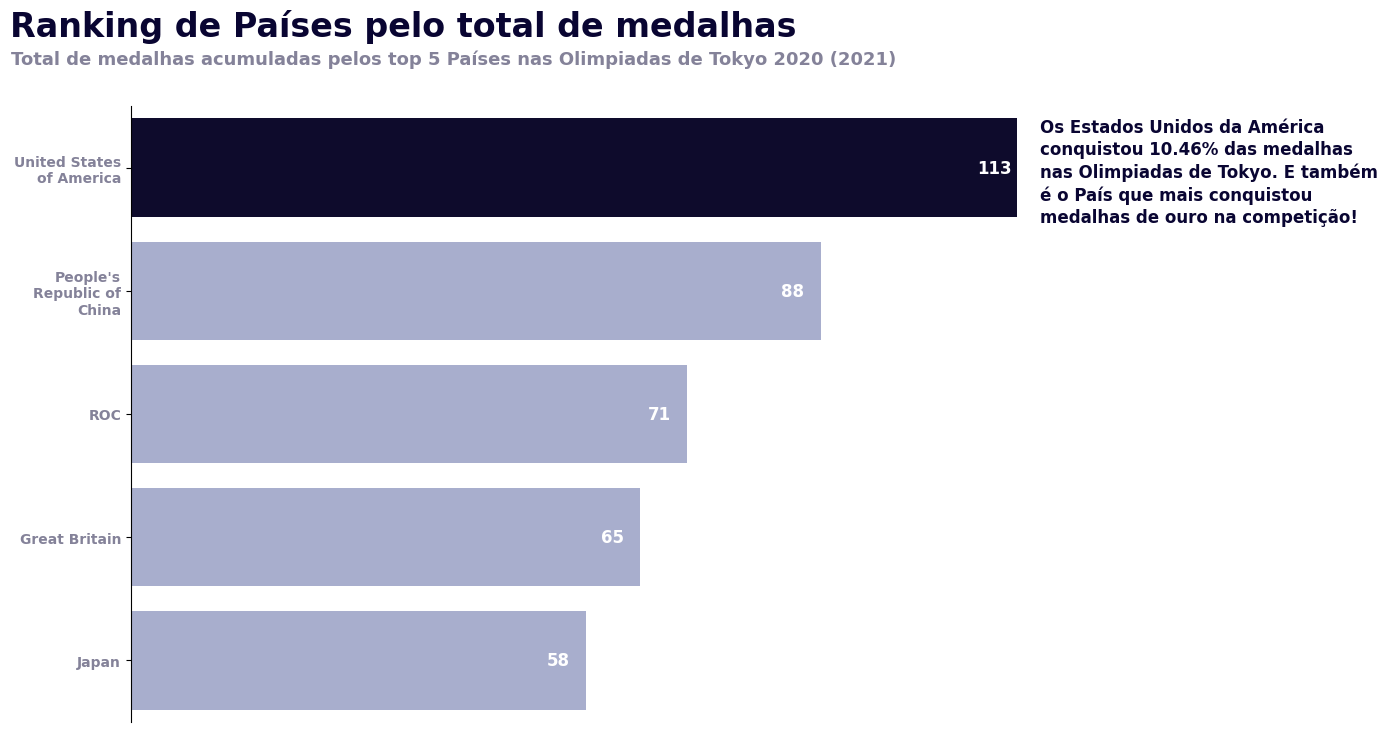

In [92]:
palette = ['#090532'] + ['#A2AAD3'] * (len(sorted_medals)-1)

fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(x='Total', y='Team/NOC', data=sorted_medals, palette=palette)

ax.set_title('Ranking de Países pelo total de medalhas',
             loc='left',
             fontweight=600,
             fontsize=24,
             x=-0.13,
             y=1.1,
             color='#090532')

fig.suptitle('Total de medalhas acumuladas pelos top 5 Países nas Olimpiadas de Tokyo 2020 (2021)',
             x=0.025,
             ha='left',
             y=0.95,
             fontsize= 13,
             fontweight=600,
             color='#848299',
             alpha=1)

wrapped_countries = [textwrap.fill(country, width=15) for country in sorted_medals['Team/NOC']]

ax.set_ylabel('')
ax.set_yticklabels(wrapped_countries, fontweight='semibold', color='#848299')

ax.set_xlabel('')
ax.set_xticks([])

for index, (valor, pais) in enumerate(zip(sorted_medals['Total'], sorted_medals['Team/NOC'])):
    ax.text(valor-5, 
            index, 
            f'{valor}', 
            va='center', 
            ha='left', 
            fontsize=12, 
            fontweight='bold', 
            color='white')
    
perc_eua = (medals[medals['Rank'] == 1]['Total'] / medals['Total'].sum()) * 100
perc_eua = perc_eua[0].round(2)

ax.annotate(f'Os Estados Unidos da América\nconquistou {perc_eua}% das medalhas\nnas Olimpiadas de Tokyo. E também\né o País que mais conquistou\nmedalhas de ouro na competição!',
            xy=[116, -0.4],
            va='top',
            fontsize=12,
            fontweight=600,
            color='#090532',
            linespacing=1.3)

sns.despine(bottom=True)
